## NYC Green Taxi Tip Prediction

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import cross_validation, metrics
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV 
from shapely.geometry import Point,Polygon,MultiPoint,MultiPolygon
from math import sqrt




%matplotlib inline

In [2]:
# import os
# path = 'E:/Projects/NYC_Green_Taxi'
# os.getcwd()
# os.chdir(path)

In [3]:
#Solution for Question 1

data = pd.read_csv('green_tripdata_2015-09.csv')
data.head(10)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
5,2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297,40.808186,-73.937668,40.821198,1,...,5.5,0.5,0.5,1.36,0.0,NaN,0.3,8.16,1,1.0
6,2,2015-09-01 00:00:52,2015-09-01 00:05:50,N,1,-73.890877,40.746426,-73.876923,40.756306,1,...,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,1,1.0
7,2,2015-09-01 00:02:15,2015-09-01 00:05:34,N,1,-73.946701,40.797321,-73.937645,40.804516,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
8,2,2015-09-01 00:02:36,2015-09-01 00:07:20,N,1,-73.963150,40.693829,-73.956787,40.680531,1,...,6.0,0.5,0.5,1.46,0.0,NaN,0.3,8.76,1,1.0
9,2,2015-09-01 00:02:13,2015-09-01 00:07:23,N,1,-73.896820,40.746128,-73.888626,40.752724,1,...,5.5,0.5,0.5,0.00,0.0,NaN,0.3,6.80,2,1.0


In [4]:
data.tail(10)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
1494916,1,2015-09-30 23:00:29,2015-09-30 23:20:19,N,1,-73.957939,40.721851,-73.912788,40.780136,1,...,19.0,0.5,0.5,4.05,0.0,NaN,0.3,24.35,1,1.0
1494917,1,2015-09-30 23:01:36,2015-09-30 23:06:14,N,1,-73.941010,40.700401,-73.951485,40.689667,1,...,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1.0
1494918,1,2015-09-30 23:00:17,2015-09-30 23:05:51,N,1,-73.928070,40.824333,-73.915825,40.815277,2,...,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1.0
1494919,1,2015-09-30 23:00:18,2015-09-30 23:06:00,N,1,-73.945869,40.816177,-73.942863,40.829807,1,...,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1.0
1494920,1,2015-09-30 23:01:05,2015-09-30 23:19:14,N,1,-73.996315,40.690693,-73.943321,40.684181,1,...,15.5,0.5,0.5,4.20,0.0,NaN,0.3,21.00,1,1.0
1494921,1,2015-09-30 23:00:01,2015-09-30 23:17:21,N,1,-73.925339,40.761776,-73.786606,40.770184,1,...,30.5,0.5,0.5,0.00,0.0,NaN,0.3,31.80,2,1.0
1494922,1,2015-09-30 23:00:05,2015-09-30 23:08:13,N,1,-73.974312,40.685802,-73.980591,40.664055,1,...,8.0,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2,1.0
1494923,1,2015-09-30 23:00:30,2015-09-30 23:08:39,N,1,-73.996437,40.681416,-73.998283,40.662296,1,...,7.5,0.5,0.5,0.00,0.0,NaN,0.3,8.80,2,1.0
1494924,1,2015-09-30 23:00:10,2015-09-30 23:03:49,N,1,-73.953606,40.587482,-73.941071,40.590843,1,...,5.0,0.5,0.5,1.25,0.0,NaN,0.3,7.55,1,1.0
1494925,1,2015-09-30 23:00:11,2015-09-30 23:05:36,N,1,-73.966110,40.681351,-73.955452,40.691002,1,...,6.5,0.5,0.5,1.00,0.0,NaN,0.3,8.80,1,1.0


In [5]:
print('Number of rows in data    : ', data.shape[0],'\nNumber of columns in data : ', data.shape[1])

Number of rows in data    :  1494926 
Number of columns in data :  21



Solution for Question 2


Text(0.5, 1.0, 'Histogram of Trip distance')

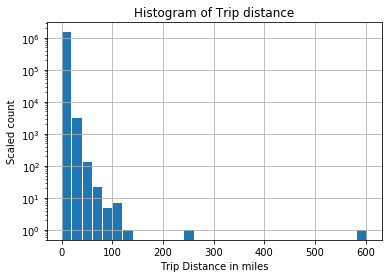

In [6]:
plt.figure()
data.Trip_distance.hist(bins = 30, rwidth= 0.9)
plt.yscale('log')
plt.xlabel('Trip Distance in miles')
plt.ylabel('Scaled count')
plt.title('Histogram of Trip distance') 


The Trip distance feature seems to be skewed to the right. Most probably because distance can't be negative, so its lower limit  is at zero. We can observe many outliers in the histogram. Such outliers can affect badly our model, so it is better to remove them after certain assumptions. 

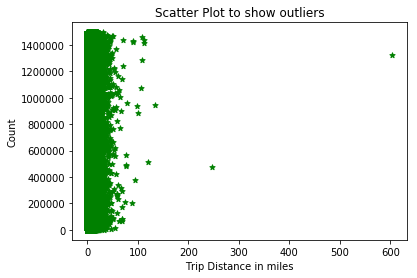

In [7]:
# plotting points as a scatter plot 
plt.figure()
plt.scatter(x = data.Trip_distance, y = pd.Series(range(data.shape[0])), color= "green",  
            marker= "*", s=30)    
plt.title('Scatter Plot to show outliers') 
plt.xlabel('Trip Distance in miles')
plt.ylabel('Count')
plt.show() 


The above scatter plot clearly shows the outliers.. 

In [8]:
data.Trip_distance.describe()

count    1.494926e+06
mean     2.968141e+00
std      3.076621e+00
min      0.000000e+00
25%      1.100000e+00
50%      1.980000e+00
75%      3.740000e+00
max      6.031000e+02
Name: Trip_distance, dtype: float64

As expected, we could see a high value standard deviation. 
Thus, to remove outliers, we can set our threshold to 3*sigma, i.e 3 times standard deviation .

In [9]:
#We store mean and standard deviation values in variables for calculation purpose.
mean = np.mean(data.Trip_distance)
std = np.std(data.Trip_distance)
print('Mean value = ',mean)
print('Standard deviation = ',std)

Mean value =  2.9681408511189864
Standard deviation =  3.076619780340042


In [10]:
#thus to remove outliers, we consider only the values with less than 3σ (3*std)

dist1 = [x for x in data.Trip_distance if (x > mean - 3 * std)]
dist1 = [x for x in dist1 if (x < mean + 3 * std)]
dist1 = pd.Series(dist1)

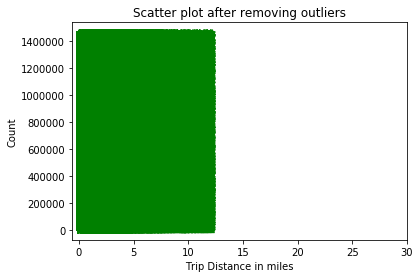

In [11]:
#To see the outlier-free graph properly, we plot the scatter plot with x-axis limit extending till 30 miles
plt.figure()
plt.scatter(x =dist1, y = pd.Series(range(len(dist1))), color= "green",  
            marker= "*", s=30)
plt.xticks(np.arange(0,35, 5))
plt.title('Scatter plot after removing outliers')
plt.xlabel('Trip Distance in miles')
plt.ylabel('Count')


plt.show()

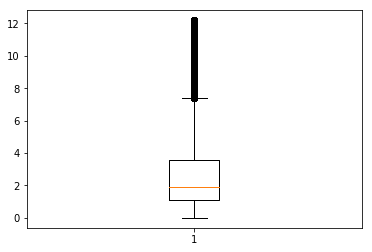

In [12]:
#We can confirm our results by observing the box plot shown below.
plt.boxplot(dist1)
plt.show()

Text(0, 0.5, 'Count')

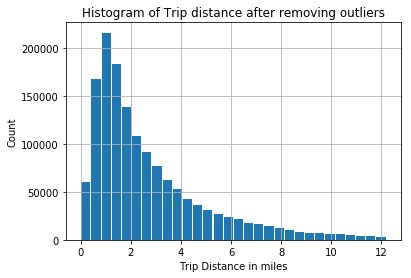

In [13]:

dist1.hist(bins = 30, rwidth= 0.9)
plt.title('Histogram of Trip distance after removing outliers')
plt.xlabel('Trip Distance in miles')
plt.ylabel('Count')



We can see that the histogram after removal of outliers shows lognormal behavior. This confirms that, the trips are not random, as we would have gotten gaussian behavior in that case. 
It pretty much makes sense for this histogram to behave in such a way as taxi trips are often but not always, for commuting for work, so office hours should have an impact on it.


Solution for Question 3A 

Text(0.5, 0, 'Time in Hours')

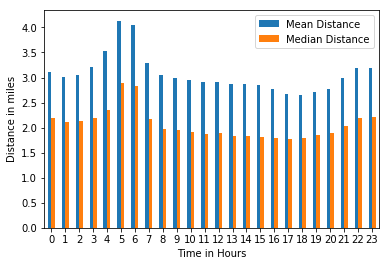

In [14]:

pickupTime = pd.to_datetime(data['lpep_pickup_datetime'])

q3 = data.groupby(pickupTime.dt.hour, as_index = False)['Trip_distance'].agg({'Mean Distance':'mean', 'Median Distance':'median'})
q3.index.names=['PickUp Hour']


q3.plot.bar()
plt.ylabel('Distance in miles')
plt.xticks(rotation = 0)
plt.xlabel('Time in Hours')

We can conclude that the mean and median of distance of trips is maximum during the morning time from  4.00 -6.00 hrs 

In [15]:
print(q3)

             Mean Distance  Median Distance
PickUp Hour                                
0                 3.115276             2.20
1                 3.017347             2.12
2                 3.046176             2.14
3                 3.212945             2.20
4                 3.526555             2.36
5                 4.133474             2.90
6                 4.055149             2.84
7                 3.284394             2.17
8                 3.048450             1.98
9                 2.999105             1.96
10                2.944482             1.92
11                2.912015             1.88
12                2.903065             1.89
13                2.878294             1.84
14                2.864304             1.83
15                2.857040             1.81
16                2.779852             1.80
17                2.679114             1.78
18                2.653222             1.80
19                2.715597             1.85
20                2.777052      

We can confirm our conclusion with the above values.

Solution for Question 3B


There are three main airports lying in and near NYC area : 1) JFK, 2) LaGuardia ,3) EWR (Newark) 
We have RateCodeIDs of JFK and Newark (we make assumption that trip to Newark is mainly for EWR airport)
For LGA, I have taken approximate geographical coordinates of the surrounding area of the airport using GoogleMaps.


In [16]:
#1) JFK 
    
JFK = data[(data.RateCodeID==2)]
print("Count of trips to/from JFK airport: ", JFK.shape[0])
print("Average fare to/from JFK per trip: $ %.3f"% JFK.Fare_amount.mean())


Count of trips to/from JFK airport:  4435
Average fare to/from JFK per trip: $ 49.022


In [17]:
#2)LaGuardia Airport (LGA)

LGA = data[((data.Pickup_longitude > -73.887825) & (data.Pickup_longitude < -73.860984 )
               & (data.Pickup_latitude > 40.768692) & (data.Pickup_latitude < 40.774285)) |
              ((data.Dropoff_longitude >  -73.887825) & (data.Dropoff_longitude < -73.860984)
               & (data.Dropoff_latitude > 40.768692) & (data.Dropoff_latitude < 40.774285))]
print("Count of trips to/from LGA airport: ", LGA.shape[0])
print("Average fare to/from LGA per trip: $ %.3f"% LGA.Fare_amount.mean())


Count of trips to/from LGA airport:  15370
Average fare to/from LGA per trip: $ 20.593


In [18]:
#3)Newark (Considering EWR Airport)

EWR = data[(data.RateCodeID==3)]
print("Count of trips to/from EWR airport: ", EWR.shape[0])
print("Average fare to/from EWR per trip: $ %.3f"% EWR.Fare_amount.mean())



Count of trips to/from EWR airport:  1117
Average fare to/from EWR per trip: $ 48.799


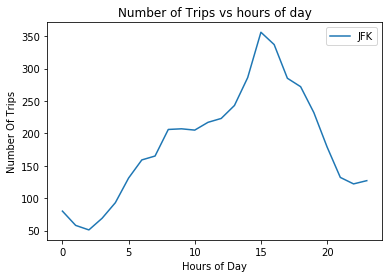

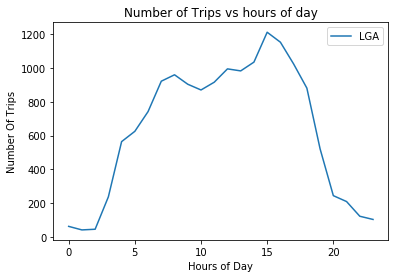

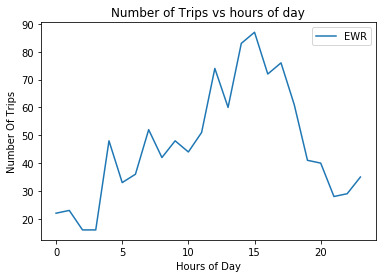

In [19]:
#Plots:

plt.figure()           
plt.plot(JFK.groupby(pd.to_datetime(JFK['lpep_pickup_datetime']).dt.hour)['lpep_pickup_datetime'].count(), label = 'JFK')
plt.xlabel('Hours of Day')
plt.ylabel('Number Of Trips')
plt.title('Number of Trips vs hours of day')
plt.legend()

plt.figure()
plt.plot(LGA.groupby(pd.to_datetime(LGA['lpep_pickup_datetime']).dt.hour)['lpep_pickup_datetime'].count(), label = 'LGA')
plt.xlabel('Hours of Day')
plt.ylabel('Number Of Trips')
plt.title('Number of Trips vs hours of day')
plt.legend()

plt.figure()
plt.plot(EWR.groupby(pd.to_datetime(EWR['lpep_pickup_datetime']).dt.hour)['lpep_pickup_datetime'].count(), label = 'EWR')
plt.xlabel('Hours of Day')
plt.ylabel('Number Of Trips')
plt.title('Number of Trips vs hours of day')
plt.legend()



We can observe, the JFK trips are more in number during the evening time after 4.00 pm . 
No. of trips to LGA are relatively higher than the other two, perhaps because it doesn't have any metro/subway or train services reaching airport. Newark Airport trips show strange behavior, maybe, the RateCode wasn't the factor we should be considering. But overall , it looks to be at peak around early evening period.

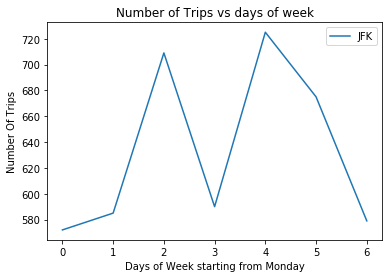

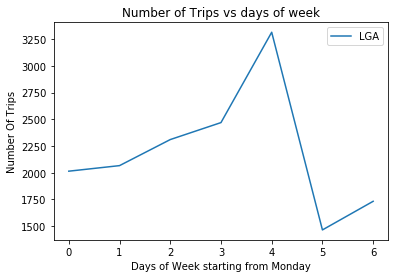

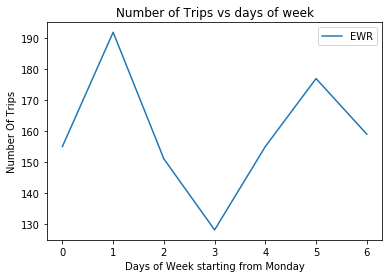

In [20]:

#Plots for Number of trips vs. days of week	      

plt.figure()           
plt.plot(JFK.groupby(pd.to_datetime(JFK['lpep_pickup_datetime']).dt.dayofweek)['lpep_pickup_datetime'].count(), label = 'JFK')
plt.xlabel('Days of Week starting from Monday')
plt.ylabel('Number Of Trips')
plt.title('Number of Trips vs days of week')
plt.legend()

plt.figure()
plt.plot(LGA.groupby(pd.to_datetime(LGA['lpep_pickup_datetime']).dt.dayofweek)['lpep_pickup_datetime'].count(), label = 'LGA')
plt.xlabel('Days of Week starting from Monday')
plt.ylabel('Number Of Trips')
plt.title('Number of Trips vs days of week')
plt.legend()

plt.figure()
plt.plot(EWR.groupby(pd.to_datetime(EWR['lpep_pickup_datetime']).dt.dayofweek)['lpep_pickup_datetime'].count(), label = 'EWR')
plt.xlabel('Days of Week starting from Monday')
plt.ylabel('Number Of Trips')
plt.title('Number of Trips vs days of week')
plt.legend()



JFK trips show upward trend for wednesdays and thursday-fridays.
LGA has highest no. of trips on saturdays
EWR (Newark) shows around 190 no. of trips on tuesdays and approximately 177 on saturdays.

In [21]:
# Solution for Question 4a 
#First we take a look at the data.
data.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


We can observe, Fare amount, Extra, MTA tax, Tip amount and Total amount have negative values, which is definitely an error.
It is  quite possible that these negative values are the actual values just with the change of sign, so it is better to take absolute value of it and keep in our dataset for now. 

In [22]:
data['Total_amount'] = data['Total_amount'].abs()
data['Fare_amount'] = data['Fare_amount'].abs()
data['Tip_amount'] = data['Tip_amount'].abs()
data['Extra'] = data['Extra'].abs()
data['Tolls_amount'] = data['Tolls_amount'].abs()
data['MTA_tax'] = data['MTA_tax'].abs()


In [23]:
# Now we check for any 'zero' values in the Total amount column to avoid division by zero while calculating  tip %

print('Number of rows in Total amount column with values = 0 : ',np.count_nonzero( data.Total_amount ==0))



Number of rows in Total amount column with values = 0 :  4172


In [24]:
#We have 4172 rows where Total_amount == 0
#But, it is not possible to have Total_amount = 0, so we can try to impute it but for now we will consider those columns as invalid.

#Same applies for Fare_amount
print('Number of rows in Fare amount column with values = 0 : ',np.count_nonzero( data.Fare_amount ==0))


Number of rows in Fare amount column with values = 0 :  4468


In [25]:
#thus, we create a new dataframe, with all positive cost values
c_data = data[(data.Total_amount > 0) & (data.Fare_amount > 0 )]


In [26]:
#Check for any negative tip amount 
np.count_nonzero( c_data.Tip_amount < 0)


0

In [95]:
#the derived variable for tip is as given below

c_data['Tip_percentage'] = 100*(c_data['Tip_amount'] / c_data['Total_amount'])

In [94]:

c_data.head(10)


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,Tip_percentage
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,0.0,9.75,1,2.0,20.000000
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,0.0,45.00,1,2.0,0.000000
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,0.3,5.80,1,1.0,8.620690
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0,0.000000
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0,0.000000
5,2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297,40.808186,-73.937668,40.821198,1,...,5.5,0.5,0.5,1.36,0.0,0.3,8.16,1,1.0,16.666667
6,2,2015-09-01 00:00:52,2015-09-01 00:05:50,N,1,-73.890877,40.746426,-73.876923,40.756306,1,...,6.5,0.5,0.5,0.00,0.0,0.3,7.80,1,1.0,0.000000
7,2,2015-09-01 00:02:15,2015-09-01 00:05:34,N,1,-73.946701,40.797321,-73.937645,40.804516,1,...,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0,0.000000
8,2,2015-09-01 00:02:36,2015-09-01 00:07:20,N,1,-73.963150,40.693829,-73.956787,40.680531,1,...,6.0,0.5,0.5,1.46,0.0,0.3,8.76,1,1.0,16.666667
9,2,2015-09-01 00:02:13,2015-09-01 00:07:23,N,1,-73.896820,40.746128,-73.888626,40.752724,1,...,5.5,0.5,0.5,0.00,0.0,0.3,6.80,2,1.0,0.000000


In [28]:
#we check for any Null (missing) values in the Tip_percentage column, there should be none.
c_data['Tip_percentage'].isna().sum()


0

Thus, we obtained a derived variable for tip percentage. 
So let us process with building a predictive model for the same.

Solution for Question 4 b

In [29]:
#We begin with the clean_data dataframe from Q4a.

#Let us check for missing values
c_data.isna().sum()

VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1490458
improvement_surcharge          0
Total_amount                   0
Payment_type                   0
Trip_type                      4
Tip_percentage                 0
dtype: int64

In [30]:
#We can see, the column 'Ehail_fee' has almost all row values missing.
#Thus, there's no harm in dropping the entire column.

c_data = c_data.drop(['Ehail_fee'], axis = 1)


In [31]:
#the column 'Trip_type ' has a blank space after 'type' which can lead to unwanted errors in future, thus we rename it.
c_data.rename(columns={'Trip_type ':'Trip_type'}, inplace=True)

#We saw that, Trip type has 4 missing values. So let us first check the other features of these 4 rows.
naTriptype = c_data[c_data['Trip_type'].isna()].index.tolist()
tripType  = c_data.loc[naTriptype,:]

tripType.head()


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,Tip_percentage
984680,1,2015-09-20 05:49:23,2015-09-20 09:49:23,Y,99,-73.932220,40.800476,0.0,0.0,0,...,17.30,0.0,0.0,0.0,0.0,0.0,17.30,1,NaN,0.0
985599,1,2015-09-20 06:27:40,2015-09-20 10:27:40,Y,99,-73.899170,40.746098,0.0,0.0,0,...,12.35,0.0,0.0,0.0,0.0,0.0,12.35,1,NaN,0.0
985620,1,2015-09-20 06:22:12,2015-09-20 10:22:12,Y,99,-73.957703,40.717789,0.0,0.0,0,...,23.15,0.0,0.0,0.0,0.0,0.0,23.15,1,NaN,0.0
1070054,1,2015-09-22 06:43:33,2015-09-22 10:43:33,Y,99,-73.928520,40.692528,0.0,0.0,0,...,20.30,0.0,0.0,0.0,0.0,0.0,20.30,3,NaN,0.0


We can observe, other features of these columns have unusual values, thus we can remove all of the 4 rows.


In [32]:
c_data = c_data.drop(naTriptype)
#Let us assign this data to a new dataframe,

clean_data = c_data.copy()
clean_data.isna().sum() #Checking for any missing values

VendorID                 0
lpep_pickup_datetime     0
Lpep_dropoff_datetime    0
Store_and_fwd_flag       0
RateCodeID               0
Pickup_longitude         0
Pickup_latitude          0
Dropoff_longitude        0
Dropoff_latitude         0
Passenger_count          0
Trip_distance            0
Fare_amount              0
Extra                    0
MTA_tax                  0
Tip_amount               0
Tolls_amount             0
improvement_surcharge    0
Total_amount             0
Payment_type             0
Trip_type                0
Tip_percentage           0
dtype: int64

We have obtained a clean data.

#Now we make use of object datatype features by making new variables from it which may / may not help in our modelling.

#1. Convert them to hours of day from 0-23
#2. Use them to calculate the total duration of the trips.


In [33]:
#1. 
clean_data['Pickup_hour'] = pd.DatetimeIndex(clean_data['lpep_pickup_datetime']).hour
clean_data['Dropoff_hour'] = pd.DatetimeIndex(clean_data['Lpep_dropoff_datetime']).hour


In [34]:
#2.

clean_data['Pickup_datetime'] = clean_data.lpep_pickup_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
clean_data['Dropoff_datetime'] = clean_data.Lpep_dropoff_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

clean_data['Trip_duration'] = ((clean_data.Dropoff_datetime-clean_data.Pickup_datetime).apply(lambda x:x.total_seconds()/60.))



In [35]:
#Now that we have Trip duration, we can drop the  pickup/dropoff datetimes that we created 
clean_data = clean_data.drop(['Pickup_datetime','Dropoff_datetime'],axis = 1)


In [36]:
#First we check the data types of features.
print(clean_data.dtypes)

VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                float64
Tip_percentage           float64
Pickup_hour                int64
Dropoff_hour               int64
Trip_duration            float64
dtype: object


Here,VendorID, RateCodeID, Payment_type and Trip_type are given as integers, but we shouldn't confuse them with continuous variables.

<function matplotlib.pyplot.show(*args, **kw)>

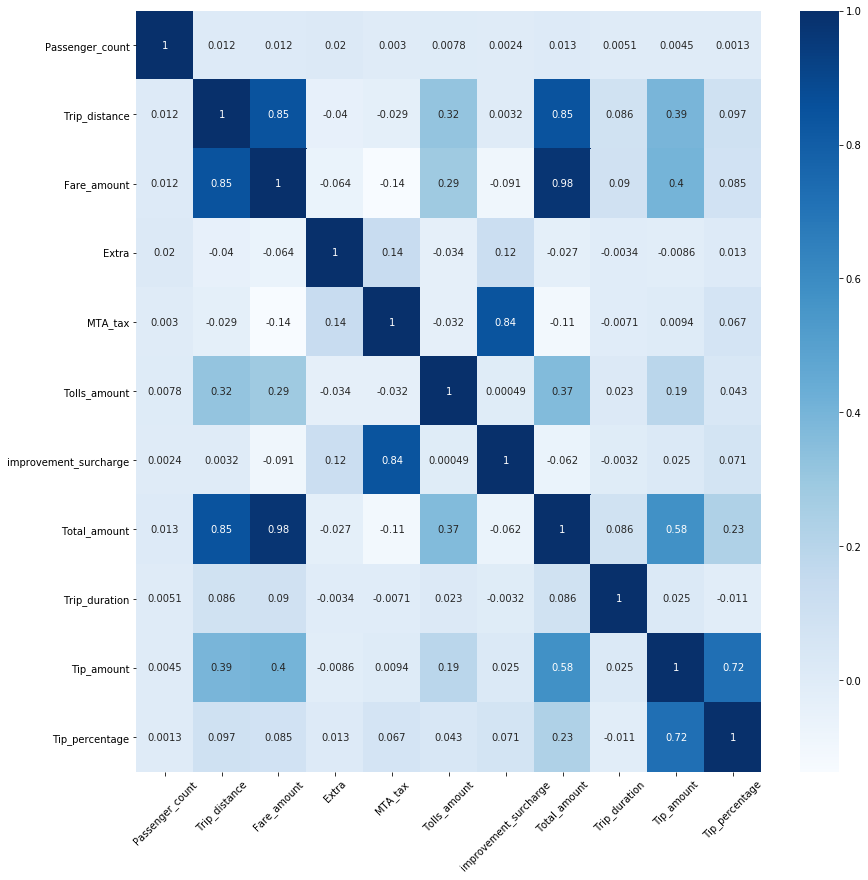

In [38]:
#Thus, while finding the correlation, we use only continuous variables like :
cnt_var=['Passenger_count','Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',  'Tolls_amount', 'improvement_surcharge', 'Total_amount','Trip_duration','Tip_amount','Tip_percentage']

plt.figure(figsize=(14,14))
cor = clean_data[cnt_var].corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Blues)
plt.xticks(rotation = 45)
plt.show


Thus, we can say, Fare amount, Total  amount and Trip distance show very  high correlation among themselves, i.e multicollinearity is high.
Further, Tip percentage barely has any linearity with the independent variables.
Therefore, linear regression would not perform well. 
However we will compare linear regression with random forest regressor and observe the results.



Dealing with Categorical variables

Before moving further, let's us convert values of 'Store_and_fwd_flag' columns from strings to int
which would make it easier to calculate the Variance Inflation Factor (VIF).
VIF helps in detecing the multicollinearity among the independent categorical variables. 
Although we won't be making linear regressor as our primary model, its better to understand the importance of each feature.


In [39]:
clean_data.Store_and_fwd_flag.replace(('N','Y'),(0,1), inplace=True)

In [40]:
cat_vars = ['VendorID','Store_and_fwd_flag','RateCodeID','Payment_type','Trip_type','Pickup_hour','Dropoff_hour']


In [41]:
df = clean_data[cat_vars]

df = df.assign(intercept = 1)     # adding an intercept (constant value =1) required for VIF calculation
df.head()

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif.round(1)

,VIF Factor,features
0,1.0,VendorID
1,1.0,Store_and_fwd_flag
2,11.9,RateCodeID
3,1.0,Payment_type
4,11.9,Trip_type
5,7.8,Pickup_hour
6,7.8,Dropoff_hour
7,396.6,intercept


As the Variance inflation factor of more than half of the categorical variables is high,there exists multicollinearity. 
However, we can conclude that  VendorID, Store_and_fwd_flag and Payment_type might be important features.

In [42]:
#Getting started with modelling,
#let us generate a copy of our clean_data , say, modelling data, m_data.

m_data = clean_data.copy()
raw_X = m_data.drop('Tip_percentage', axis = 1) #we drop our target variable
y = m_data['Tip_percentage']

raw_X.columns 


Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount',
       'Payment_type', 'Trip_type', 'Pickup_hour', 'Dropoff_hour',
       'Trip_duration'],
      dtype='object')

In [44]:
#Pickup longitude/latitude and dropoff longitude/latitude are categorical variables 
#and seem to be of very less importance. Thus, there shouldn't be any harm in dropping them.
#Same for lpep_pickup_datetime, Lpep_dropoff_datetime (Object datatype)
raw_X = raw_X.drop(['Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude','lpep_pickup_datetime','Lpep_dropoff_datetime'], axis=1)

raw_X.columns


Index(['VendorID', 'Store_and_fwd_flag', 'RateCodeID', 'Passenger_count',
       'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount',
       'Tolls_amount', 'improvement_surcharge', 'Total_amount', 'Payment_type',
       'Trip_type', 'Pickup_hour', 'Dropoff_hour', 'Trip_duration'],
      dtype='object')

In [45]:
#converting the datatype to appropriate ones, before performing one-hot encoding on categorical variables.

raw_X[cat_vars] = raw_X[cat_vars].astype('category') 
raw_X.dtypes


VendorID                 category
Store_and_fwd_flag       category
RateCodeID               category
Passenger_count             int64
Trip_distance             float64
Fare_amount               float64
Extra                     float64
MTA_tax                   float64
Tip_amount                float64
Tolls_amount              float64
improvement_surcharge     float64
Total_amount              float64
Payment_type             category
Trip_type                category
Pickup_hour              category
Dropoff_hour             category
Trip_duration             float64
dtype: object

In [46]:
#Performing One Hot Encoding using get_dummies

X = pd.get_dummies(raw_X,drop_first=False)


In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


#Let's begin with modelling. 


Linear Regression 

In [48]:

from sklearn.linear_model import LinearRegression
Lregressor = LinearRegression()
Lregressor.fit(X_train, y_train)

# Predicting the Test set results
y_predLR = Lregressor.predict(X_test)



In [67]:
print("Mean squared error:", metrics.mean_squared_error(y_test, y_predLR))

print("Root mean square error = ",sqrt(mean_squared_error(y_test,y_predLR)))

print("Mean absolute error = " , metrics.mean_absolute_error(y_test,y_predLR))


Mean squared error: 16.4835270479382
Root mean square error =  4.059991015745996
Mean absolute error =  2.461387113566287


In [51]:
#Again we try LR, now with few selected features.

rawX_LR = raw_X[['Payment_type','Trip_distance','Total_amount','Fare_amount','VendorID','Tip_amount']]
X_lr = pd.get_dummies(rawX_LR,drop_first=False)

#Splitting train and test dataset
Xlr_train,Xlr_test,ylr_train,ylr_test = train_test_split(X_lr,y,test_size=0.3,random_state=42)

Lregressor.fit(Xlr_train, ylr_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
# Predicting the Test set results
ylr_pred = Lregressor.predict(Xlr_test)


print("Mean squared error:", metrics.mean_squared_error(ylr_test, ylr_pred))

print("Root mean square error = ",sqrt(mean_squared_error(ylr_test,ylr_pred)))

print("Mean absolute error = " , metrics.mean_absolute_error(ylr_test,ylr_pred))


Mean squared error: 16.58419090873146
Root mean square error =  4.07236920093592
Mean absolute error =  2.459120899509563


As we had as said earlier, linear regression isn't the best model for this problem. Thus, we go ahead and check our results with random forest regressor.

In [54]:

#Creating Random Forest regressor and fitting the model
regRF = RandomForestRegressor(n_estimators = 100, random_state = 42)

regRF.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [55]:
#Predicting the values
tipPercent_Pred = regRF.predict(X_test)


In [69]:
print("Mean squared error:", metrics.mean_squared_error(y_test, tipPercent_Pred))

print("Root mean square error = ",sqrt(mean_squared_error(y_test,tipPercent_Pred)))

print("Mean absolute error = " , metrics.mean_absolute_error(y_test,tipPercent_Pred))


Mean squared error: 0.006358208999044414
Root mean square error =  0.07973837845758097
Mean absolute error =  0.004060577749618104


We observe that, the root mean square error looks good as it is close to zero. And is much better than linear regressor.


Solution for Question 5

B) Visualizations


We use polygon object, to cover the area of the boroughs. 
And then pass our dataset through the polygon to extract patterns that belong that particular borough(polygon) using the pickup and dropoff longitudes and latitudes.

I refered https://automating-gis-processes.github.io/CSC18/lessons/L4/point-in-polygon.html for the polygon calculation.

In [57]:
#Intra-Borough :

data5 = clean_data.copy()

manhattan = [(40.881212, -73.933087),(40.874490, -73.914884),(40.875473, -73.909898),
              (40.872396, -73.909200),(40.834737, -73.934311),(40.806325, -73.932756),
              (40.794604, -73.914221),(40.774082, -73.940022),(40.711342, -73.978217),
              (40.704636, -74.001057),(40.691037, -74.020353),(40.704644, -74.032461)]

polM = Polygon(manhattan)

def in_man(loc,poi = polM):

    return 1*(poi.contains(Point(loc)))


data5['manhattan_Pickup'] = data5[['Pickup_latitude','Pickup_longitude']].apply(lambda r:in_man((r[0],r[1])),axis=1)
data5['manhattan_Dropoff'] = data5[['Dropoff_latitude','Dropoff_longitude']].apply(lambda r:in_man((r[0],r[1])),axis=1)

data5['intra_manhattan'] = (data5.manhattan_Pickup == 1) & (data5.manhattan_Dropoff ==1)
data5.intra_manhattan.replace((True,False),(1,0), inplace=True)


In [58]:

bronx = [(40.880984, -73.923339),(40.879686, -73.909600),(40.873193, -73.904792),
              (40.834497, -73.931911),(40.806710, -73.929844),(40.788006, -73.875301),
              (40.805138, -73.852991),(40.807951, -73.799115),(40.872051, -73.755033),
              (40.892908, -73.838140),(40.903299, -73.842251),(40.905643, -73.853589),
              (40.900653, -73.862054),(40.916150, -73.917223),(40.882968, -73.930874)]

polBx = Polygon(bronx)

def in_bronx(loc,poi= polBx):

    return 1*(poi.contains(Point(loc)))


data5['bronx_Pickup'] = data5[['Pickup_latitude','Pickup_longitude']].apply(lambda s:in_bronx((s[0],s[1])),axis=1)
data5['bronx_Dropoff'] = data5[['Dropoff_latitude','Dropoff_longitude']].apply(lambda s:in_bronx((s[0],s[1])),axis=1)

data5['intra_bronx'] = (data5.bronx_Pickup == 1) & (data5.bronx_Dropoff ==1)
data5.intra_bronx.replace((True,False),(1,0), inplace=True)


In [59]:
brooklyn = [(40.679006, -74.019129),(40.625878, -74.052132),(40.605031, -74.035672),
              (40.565419, -74.011009),(40.577759, -73.879951),(40.640244, -73.856410),
              (40.665282, -73.870067),(40.690821, -73.873419),(40.680441, -73.898195),
              (40.735747, -73.953742),(40.704902, -73.969127),(40.678521, -74.017334)]

polBkl = Polygon(brooklyn)

def in_brooklyn(loc,poi= polBkl):

    return 1*(poi.contains(Point(loc)))

data5['brooklyn_Pickup'] = data5[['Pickup_latitude','Pickup_longitude']].apply(lambda t:in_brooklyn((t[0],t[1])),axis=1)
data5['brooklyn_Dropoff'] = data5[['Dropoff_latitude','Dropoff_longitude']].apply(lambda t:in_brooklyn((t[0],t[1])),axis=1)

data5['intra_brooklyn'] = (data5.brooklyn_Pickup == 1) & (data5.brooklyn_Dropoff ==1)
data5.intra_brooklyn.replace((True,False),(1,0), inplace=True)


In [60]:

queens = [(40.747301, -73.953511),(40.726963, -73.923281),(40.689947, -73.893098),
              (40.699822, -73.871775),(40.597115, -73.822578),(40.558699, -73.942702),
              (40.538894, -73.935180),(40.596957, -73.745013),(40.628827, -73.784036),
              (40.658417, -73.733776),(40.723046, -73.739691),(40.740165, -73.706588),
              (40.801813, -73.775844),(40.779559, -73.886737),(40.773340, -73.928719)]

polQ = Polygon(queens)

def in_queens(loc,poi= polQ):

    return 1*(poi.contains(Point(loc)))

data5['queens_Pickup'] = data5[['Pickup_latitude','Pickup_longitude']].apply(lambda u:in_queens((u[0],u[1])),axis=1)
data5['queens_Dropoff'] = data5[['Dropoff_latitude','Dropoff_longitude']].apply(lambda u:in_queens((u[0],u[1])),axis=1)

data5['intra_queens'] = (data5.queens_Pickup == 1) & (data5.queens_Dropoff ==1)
data5.intra_queens.replace((True,False),(1,0), inplace=True)


In [61]:
statenI = [(40.646651, -74.059390),(40.644394, -74.183858),(40.622747, -74.201051),
              (40.561976, -74.203813),(40.537455, -74.247745),(40.520242, -74.242934),
              (40.509022, -74.256653),(40.485030, -74.233662),(40.602282, -74.045068),
              (40.625259, -74.059789),(40.644563, -74.058707),(40.650327, -74.079671)]

polSI = Polygon(statenI)

def in_SI(loc,poi= polSI):

    return 1*(poi.contains(Point(loc)))

data5['SI_Pickup'] = data5[['Pickup_latitude','Pickup_longitude']].apply(lambda v:in_SI((v[0],v[1])),axis=1)
data5['SI_Dropoff'] = data5[['Dropoff_latitude','Dropoff_longitude']].apply(lambda v:in_SI((v[0],v[1])),axis=1)

data5['intra_SI'] = (data5.SI_Pickup == 1) & (data5.SI_Dropoff ==1)
data5.intra_SI.replace((True,False),(1,0), inplace=True)



In [62]:
#Inter-Borough 

data5['inter_Man_Brx'] = ((data5.manhattan_Pickup == 1) & (data5.bronx_Dropoff ==1) | (data5.bronx_Pickup == 1) & (data5.manhattan_Dropoff ==1))
data5.inter_Man_Brx.replace((True,False),(1,0), inplace=True)

data5['inter_Man_Bkn'] = ((data5.manhattan_Pickup == 1) & (data5.brooklyn_Dropoff ==1) | (data5.brooklyn_Pickup == 1) & (data5.manhattan_Dropoff ==1))
data5.inter_Man_Bkn.replace((True,False),(1,0), inplace=True)

data5['inter_Man_Queens'] = ((data5.manhattan_Pickup == 1) & (data5.queens_Dropoff ==1) | (data5.queens_Pickup == 1) & (data5.manhattan_Dropoff ==1))
data5.inter_Man_Queens.replace((True,False),(1,0), inplace=True)

data5['inter_Man_SI'] = ((data5.manhattan_Pickup == 1) & (data5.SI_Dropoff ==1) | (data5.SI_Pickup == 1) & (data5.manhattan_Dropoff ==1))
data5.inter_Man_SI.replace((True,False),(1,0), inplace=True)

data5['inter_Brx_Bkn'] = ((data5.bronx_Pickup == 1) & (data5.brooklyn_Dropoff ==1) | (data5.brooklyn_Pickup == 1) & (data5.bronx_Dropoff ==1))
data5.inter_Brx_Bkn.replace((True,False),(1,0), inplace=True)

data5['inter_Brx_Queens'] = ((data5.bronx_Pickup == 1) & (data5.queens_Dropoff ==1) | (data5.queens_Pickup == 1) & (data5.bronx_Dropoff ==1))
data5.inter_Brx_Queens.replace((True,False),(1,0), inplace=True)

data5['inter_Brx_SI'] = ((data5.bronx_Pickup == 1) & (data5.SI_Dropoff ==1) | (data5.SI_Pickup == 1) & (data5.bronx_Dropoff ==1))
data5.inter_Brx_SI.replace((True,False),(1,0), inplace=True)

data5['inter_Bkn_Queens'] = ((data5.brooklyn_Pickup == 1) & (data5.queens_Dropoff ==1) | (data5.queens_Pickup == 1) & (data5.brooklyn_Dropoff ==1))
data5.inter_Bkn_Queens.replace((True,False),(1,0), inplace=True)

data5['inter_Bkn_SI'] = ((data5.brooklyn_Pickup == 1) & (data5.SI_Dropoff ==1) | (data5.SI_Pickup == 1) & (data5.brooklyn_Dropoff ==1))
data5.inter_Bkn_SI.replace((True,False),(1,0), inplace=True)

data5['inter_Queens_SI'] = ((data5.queens_Pickup == 1) & (data5.SI_Dropoff ==1) | (data5.SI_Pickup == 1) & (data5.queens_Dropoff ==1))
data5.inter_Queens_SI.replace((True,False),(1,0), inplace=True)



In [64]:
#Now lets check if there are any trips which aren't intra or inter borough,

IntraInter = ['inter_Man_Brx', 'inter_Man_Bkn','inter_Man_Queens','inter_Man_SI','inter_Brx_Bkn',
             'inter_Brx_Queens','inter_Brx_SI','inter_Bkn_Queens','inter_Bkn_SI','inter_Queens_SI',
             'intra_manhattan','intra_bronx','intra_brooklyn','intra_queens','intra_SI']

notInterIntra = np.where(~data5[IntraInter].any(axis=1))[0]
print(notInterIntra)

[      1       3      20 ... 1490435 1490444 1490448]


In [65]:
#as we are concerned about intra and inter borough trips in this question, we will delete rows having pickup/dropoff outside NYC

data5 = data5.drop(data5.index[tuple([notInterIntra])])



Text(0.5, 0, 'Intra-Borough locations')

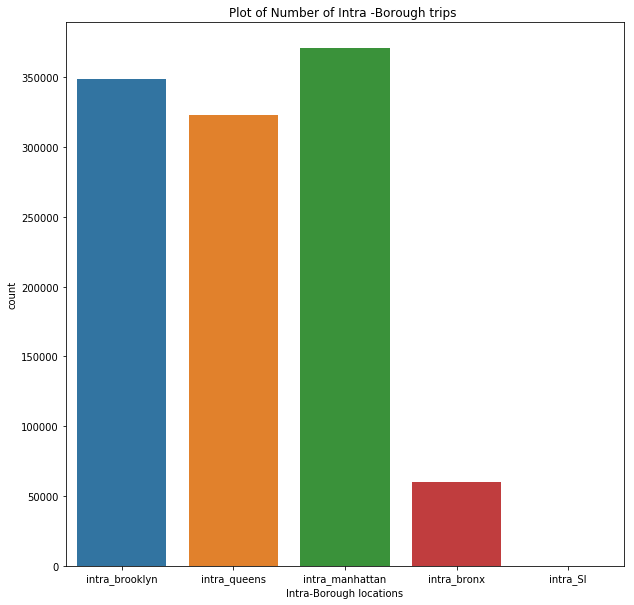

In [71]:
intraColumns = ['intra_manhattan','intra_bronx','intra_brooklyn','intra_queens','intra_SI']

vizIntra = data5[intraColumns].copy()

aa = vizIntra.copy()
aa = aa[(aa.T != 0).any()] #removing the rows which have missing value in Intra-Borough trips as these are the values of Inter-borough trips


IntraB = aa.idxmax(1)
vizIntra= aa.assign(Intra_Borough= IntraB.values)

dims = (10,10)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(x='Intra_Borough', data= vizIntra) 
plt.title('Plot of Number of Intra -Borough trips ')
plt.xlabel('Intra-Borough locations')


From the above plot, we can infere that the intra- borough traffic is larger in the Manhattan, Brooklyn and Queens regions as compared to the rest two.

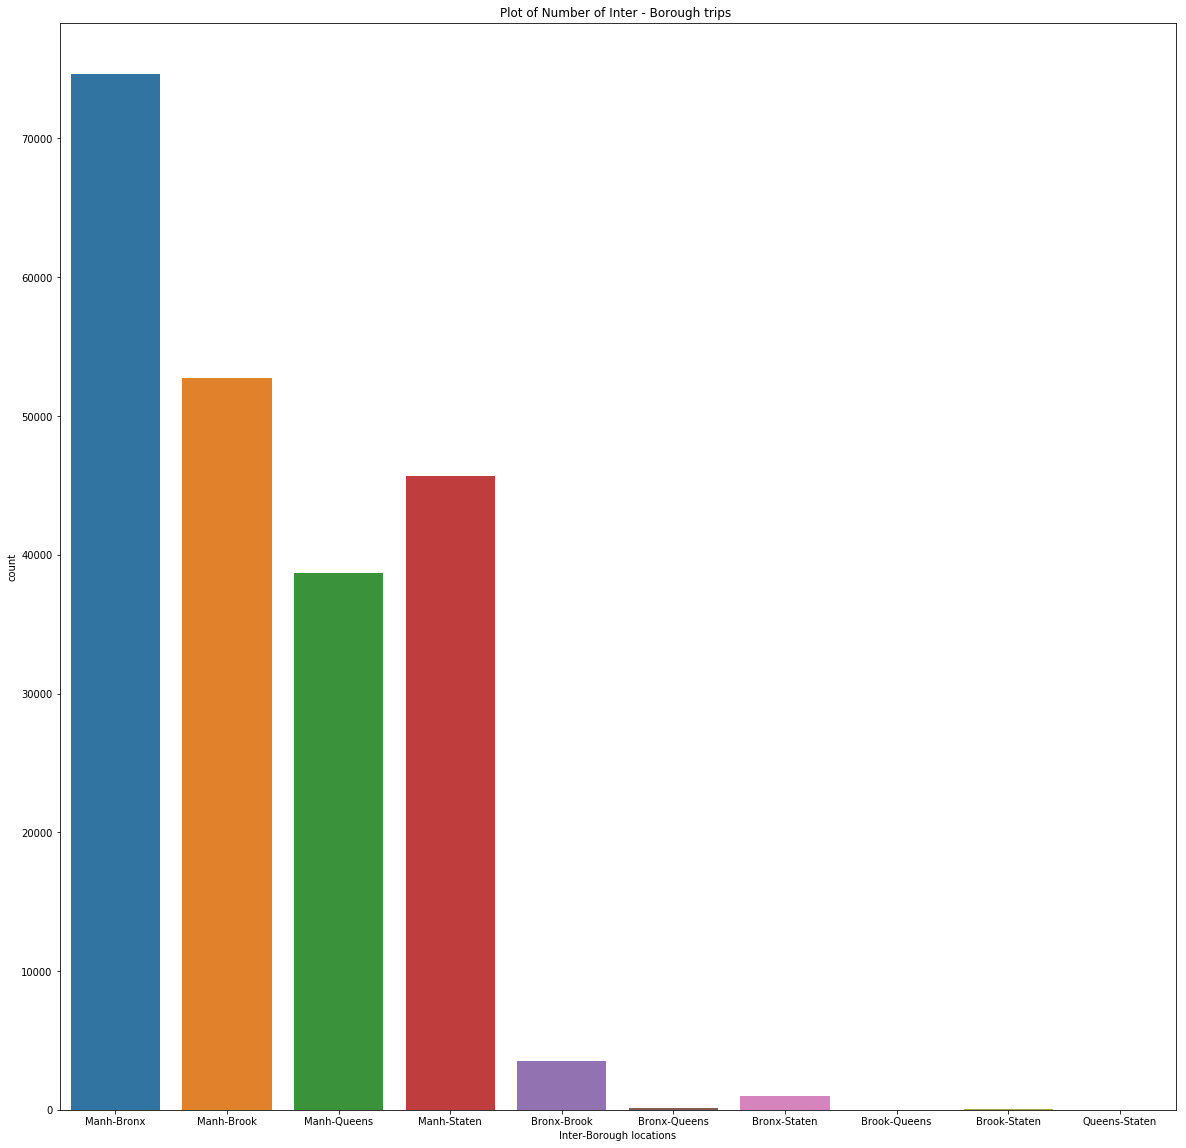

In [76]:
interColumns = ['inter_Man_Brx', 'inter_Man_Bkn','inter_Man_Queens','inter_Man_SI','inter_Brx_Bkn',
             'inter_Brx_Queens','inter_Brx_SI','inter_Bkn_Queens','inter_Bkn_SI','inter_Queens_SI']

vizInter = data5[interColumns].copy()

bb = vizInter.copy()
bb = bb[(bb.T != 0).any()]

InterB= bb.idxmax(1)

vizInter= bb.assign(Inter_Borough= InterB.values)

dims = (20,20)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(x='Inter_Borough', data= vizInter) 
labels = ['Manh-Bronx','Manh-Brook','Manh-Queens','Manh-Staten',
        'Bronx-Brook','Bronx-Queens','Bronx-Staten','Brook-Queens','Brook-Staten','Queens-Staten']
ax.set_xticklabels(labels)
plt.title('Plot of Number of Inter - Borough trips ')
plt.xlabel('Inter-Borough locations')
plt.show()

By observing the above plot, we can say, most the of NewYorkers travel between Manhattan and Bronx. It can also be observed that, Manhattan has a greater number of inter-borough trips, with all other boroughs. 

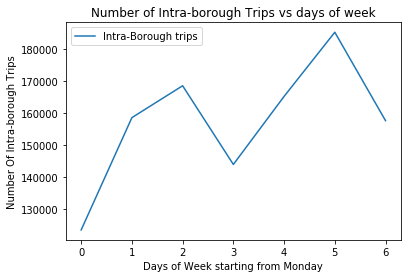

In [90]:
data6 = data5.assign(Intra_Borough= vizIntra['Intra_Borough'])
data6 = data6.dropna()


plt.figure()
plt.plot(data6.groupby(pd.to_datetime(data6['lpep_pickup_datetime']).dt.dayofweek)['Intra_Borough'].count(), label = 'Intra-Borough trips')
plt.xlabel('Days of Week starting from Monday')
plt.ylabel('Number Of Intra-borough Trips')
plt.title('Number of Intra-borough Trips vs days of week')
plt.legend()


We can observe an unsual trend here. The intra-borough trips show in dip on thursdays. However it shoots up on weekends. Perhaps due to tourist activities 

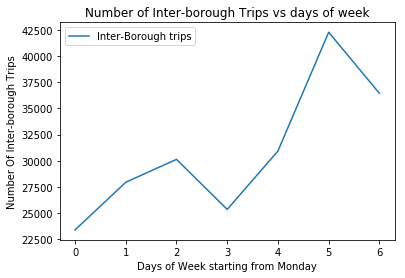

In [92]:
data7 = data5.assign(Inter_Borough= vizInter['Inter_Borough'])
data7 = data7.dropna()

plt.figure()
plt.plot(data7.groupby(pd.to_datetime(data7['lpep_pickup_datetime']).dt.dayofweek)['Inter_Borough'].count(), label = 'Inter-Borough trips')
plt.xlabel('Days of Week starting from Monday')
plt.ylabel('Number Of Inter-borough Trips')
plt.title('Number of Inter-borough Trips vs days of week')
plt.legend()

We can observe similar trends here as the intra - borough trips, but the number of inter-borough trips when compared to intra- borough are very less. 
Again , the  trips are more during weekends, perhaps NewYorkers love to travel during weekends.